# Assignment 1: Barotropic Vorticity

By: Ty Janoski

#### 1) Re-derive the barotropic vorticity budget for a non-flat ocean bottom.

Begin with planetary-geostrophic horizontal momentum equation for a Boussinesq fluid:

$$ \vec{f} \times \vec{u} = -\nabla\phi + \frac{1}{\rho_0}\frac{\partial{\vec{\tau}}}{\partial{z}}$$

Next, take the curl of both sides:

$$ \vec{f}\nabla \cdotp \vec{u} + \frac{\partial{f}}{\partial{y}}v = curl_z(\frac{\partial{\vec{\tau}}}{\partial{z}})$$

We vertically integrate, but with a non-flat bottom ocean floor, the bounds of our integration are different. We define the orography of the ocean floor as a new variable, $\eta_B$. Therefore, the lower bound of integration would be $-H + \eta_B$, where $H$ is some flat surface that represents the average ocean depth from which $\eta_B$ is the variation in. As before, $\eta$ is the sea surface height.

$$ -f \int_{-H+\eta_B}^{\eta}\nabla\cdotp\vec{u} + \beta\int_{-H+\eta_B}^{\eta}v dz = curl_z(\int_{-H+\eta_B}^{\eta}\frac{\partial{\vec{\tau}}}{\partial{z}})$$

Integrate:

$$ -f\nabla\cdotp(\vec{u}z)\rvert^\eta_{-H+\eta_B} + \beta V = curl_z(\vec{\tau}_S - \vec{\tau}_B)$$

We can further simplify the leftmost term:

$$ -f\nabla\cdotp(\vec{u}z)\rvert^\eta_{-H+\eta_B} = -f\nabla\cdotp(\vec{u}\eta) + f\nabla\cdotp(\vec{u}(-H+\eta_B) $$

We consider variations in the sea-surface very small compared to ocean depth, meaning $\nabla\cdotp(\vec{u}\eta)=0$

Decomposing the remaining term:

$$ f(\vec{u}\nabla\cdotp\eta_B + \eta_B\nabla\cdotp\vec{u}) $$

But $\nabla\cdotp\vec{u}=0$, putting it all together:


$$ \beta V + f\vec{u}\cdotp\nabla\eta_B = curl_z(\vec{\tau}_S-\vec{\tau}_B) $$

If we want to use the stommel model:

$$ \beta\frac{\partial{\psi}}{\partial{x}} + f\vec{u}\cdotp\nabla\eta_B = curl_z({\vec{\tau}}_S) - r\nabla^2\psi$$

#### 2) Calculate the Stommel solution in the MITgcm tutorial_barotropic_gyre simulation and compare it to the full solution. Use the standard wind stress (0.1 N/m^2)  and also a double-strength wind stress (0.2 N/m^2). You will have to figure out how to write an appropriately formatted binary file.

In [65]:
# Import statements:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import hvplot.xarray
import xmitgcm
xmitgcm.file_utils.clear_cache()

%matplotlib inline

In [66]:
# read in mitgcm output and look at it

rundir = '/rigel/ocp/users/janoski/tutorial_barotropic_gyre/run/'
ds = xmitgcm.open_mdsdataset(rundir, iters=72*np.arange(1,201),
                             delta_t=1200, calendar='360_day', ref_date='0000-01-01 00:00:00')
ds

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
op

<xarray.Dataset>
Dimensions:   (XC: 62, XG: 62, YC: 62, YG: 62, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 200)
Coordinates:
  * XC        (XC) >f4 -10000.0 10000.0 30000.0 ... 1190000.0 1210000.0
  * YC        (YC) >f4 -10000.0 10000.0 30000.0 ... 1190000.0 1210000.0
  * XG        (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * YG        (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * Z         (Z) >f4 -2500.0
  * Zp1       (Zp1) >f4 0.0 -5000.0
  * Zu        (Zu) >f4 -5000.0
  * Zl        (Zl) >f4 0.0
    rA        (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dxG       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyG       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    Depth     (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAz       (YG, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dxC       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyC       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAw       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAs       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    drC       (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF       (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefC    (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF    (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    hFacC     (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    hFacW     (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    hFacS     (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskC     (YC, XC) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskW     (YC, XG) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskS     (YG, XC) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
Data variables:
    S         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    V         (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PH        (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    U         (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PHL       (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    USidDrag  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    VSidDrag  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Diss   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Diss   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_ImplD  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_ImplD  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Advec  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Advec  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Cori   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Cori   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_dPhiX  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_dPhiY  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Ext    (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Ext    (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    botTauX   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    botTauY   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    T         (time, YC, XC) float32 dask.array<chunksize

In [67]:
# produce a grid from the dataset coordinates

import xgcm
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drF', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = xgcm.Grid(ds, metrics=metrics,periodic=False)

$$ \psi(x,y,t) = -\int_0^y dy' \int_{-H}^0 dz u(x', y, t) $$ 

The following line is zonal current * layer thickness (drF = 5000 m)

In [68]:
ψ = -grid.cumint((ds.U * ds.drF[0]),'Y',boundary='fill')/1e6

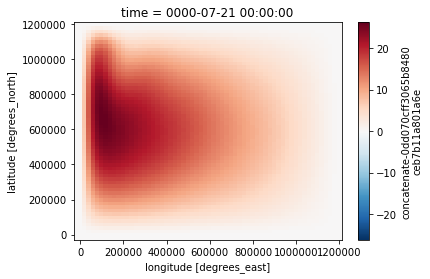

In [69]:
ψ.isel(time=-1).plot()
plt.show()

Compare this against the Stommmel model given by:

$$ \psi = \frac{\tau_0\pi}{\beta}\left(1 - \frac{x}{a} - e^{-x/(a\epsilon_S)}\right)\left(sin\frac{\pi y}{a}\right) $$

In [70]:
# read wind stress
dtype = '>f4'
# units N/m^2
taux_data = np.fromfile(f'{rundir}/windx_cosy.bin', dtype=dtype)
taux_data.shape = ds.rA.shape
rho0 = 1000.
ds['taux'] = ('YC', 'XG'), taux_data / rho0

In [71]:
# establish constants
τ0 = 0.1/1000
pi = np.pi
β = 1e-11 # s^-1 m^-1
x = ds.XG
a = float(ds.dxC.isel(YC=0,XG=slice(1,-1)).sum(dim='XG'))
ϵ = 0.04 # this is given in Vallis
y = ds.YG

In [72]:
# plug constants into derived formula
ψ_sto = (τ0 * pi / β) * (1 - (x/a) - np.exp((-1*x) / (a * ϵ))) * np.sin(pi * y / a) / 1e6

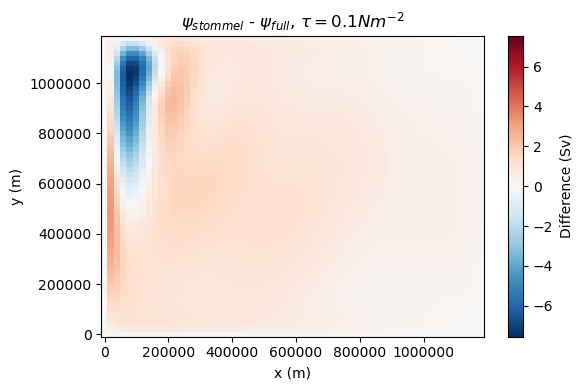

In [73]:
# plot difference
fig = plt.figure(dpi=100)
plot = (ψ_sto - ψ.isel(time=-1)).isel(XG=slice(1,-1),YG=slice(1,-1)).plot(y='YG')
plot.colorbar.set_label('Difference (Sv)')
plt.title(r'$\psi_{stommel}$ - $\psi_{full}$, $\tau=0.1Nm^{-2}$')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.show()

In [74]:
# double wind strength file

tau_x2 = np.array(ds.taux * rho0 * 2,dtype=dtype)
tau_x2.tofile(f'{rundir}/windx_cosy_double.bin')

In [75]:
# read in mitgcm output with tau=0.2 and look at it

rundir_doub = '/rigel/ocp/users/janoski/tutorial_barotropic_gyre/run_dblwnd/'
ds_doub = xmitgcm.open_mdsdataset(rundir_doub, iters=72*np.arange(1,201),
                             delta_t=1200, calendar='360_day', ref_date='0000-01-01 00:00:00')

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
op

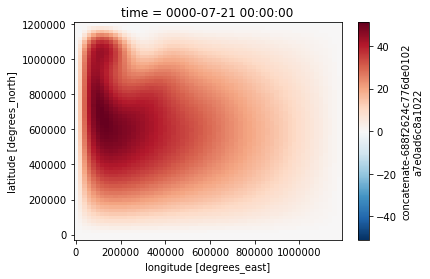

In [76]:
# find and plot full solution for psi
ψ_doub = -grid.cumint((ds_doub.U * ds_doub.drF[0]),'Y',boundary='fill')/1e6
ψ_doub.isel(time=-1).isel(XG=slice(1,-1)).plot()
plt.show()

In [77]:
τ0 = 0.2/1000
pi = np.pi
β = 1e-11 # s^-1 m^-1
x = ds.XG
a = float(ds.dxC.isel(YC=0,XG=slice(1,-1)).sum(dim='XG'))
ϵ = 0.04 # this is given in Vallis
y = ds.YG

In [78]:
# use our formula
ψ_sto_doub = (τ0 * pi / β) * (1 - (x/a) - np.exp((-1*x) / (a * ϵ))) * np.sin(pi * y / a) / 1e6

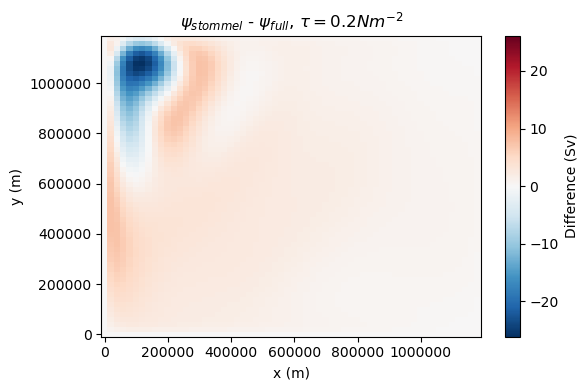

In [79]:
# plot difference
fig = plt.figure(dpi=100)
plot = (ψ_sto_doub - ψ_doub.isel(time=-1)).isel(XG=slice(1,-1),YG=slice(1,-1)).plot(y='YG')
plot.colorbar.set_label('Difference (Sv)')
plt.title(r'$\psi_{stommel}$ - $\psi_{full}$, $\tau=0.2Nm^{-2}$')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.tight_layout()
plt.show()

Overall, it seems that the Stommel model does an adequate job of reproducing the full-solution streamfunction from the MITgcm model. I would argue the Stommel model's greatest weakness is around the western-boundary current, especially in northwest sector of our grid. I suspect that Stommel's simplistic model for the western boundary current as exponentially decaying is insufficient compared to the complexity in the full-solution. Still, they are on the same order of magnitude, and for most of the basin, they have the same sign and small differences in transport.

#### 3) Diagnose all terms in the barotropic vorticity budget to the best of your ability. You may wish to use the extra diagnostics I have suggested in the github repo.

In [80]:
# change matplotlib params for plotting
plt.rcParams['axes.facecolor'] = '0.5'

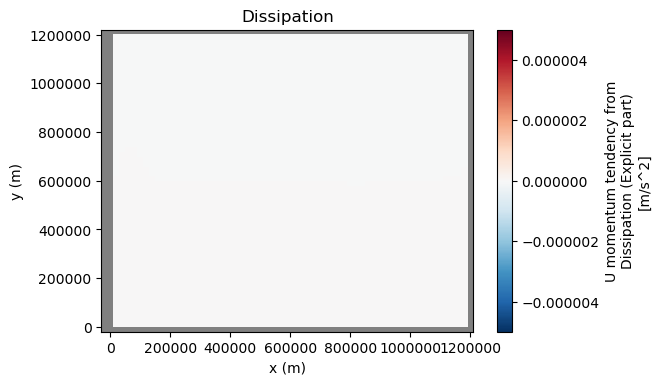

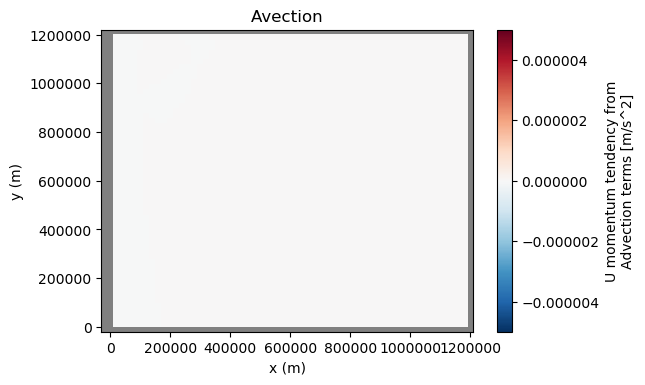

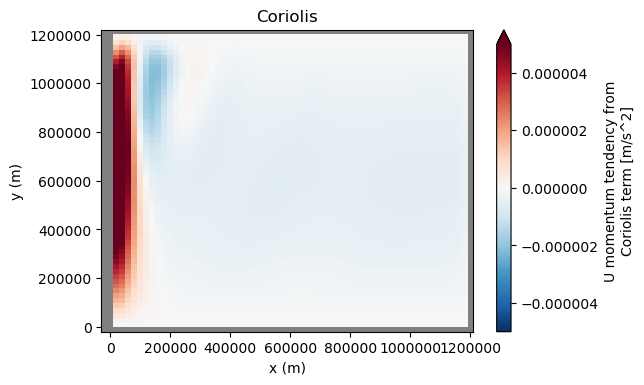

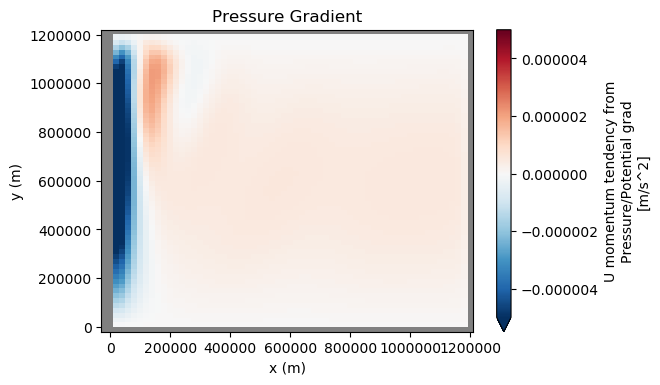

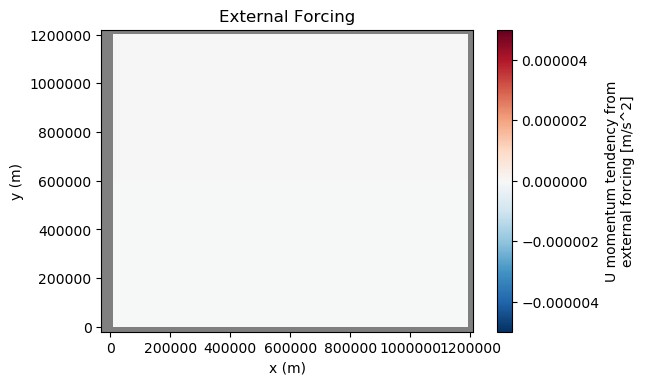

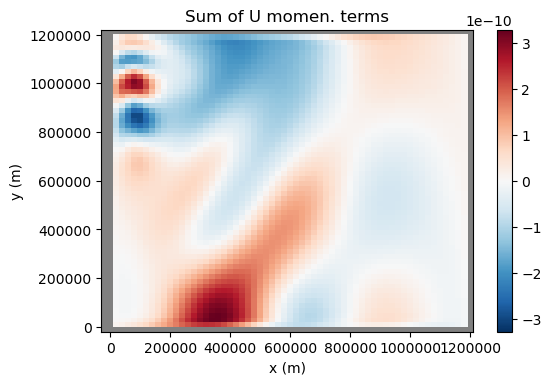

In [81]:
# zonal momentum

Um_advec_wo_coriolis = ds.Um_Advec - ds.Um_Cori
Um_advec_wo_coriolis.attrs.update(ds.Um_Advec.attrs)

names = ['Dissipation', 'Avection', 'Coriolis', 'Pressure Gradient', 'External Forcing']

terms_U = [ds.Um_Diss, Um_advec_wo_coriolis, ds.Um_Cori, ds.Um_dPhiX , ds.Um_Ext]
sum_terms_U = sum(terms_U)

vmax=5e-6


mask_u = ds.hFacW > 0.

for term in range(len(terms_U)):
    data = terms_U[term][-1].where(mask_u)
    plt.figure(dpi=100)
    data.plot(vmax=vmax)
    plt.title(names[term])
    plt.ylabel('y (m)')
    plt.xlabel('x (m)')    
    
plt.figure(dpi=100)
sum_terms_U[-1].where(mask_u).plot()
plt.title('Sum of U momen. terms')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.show()

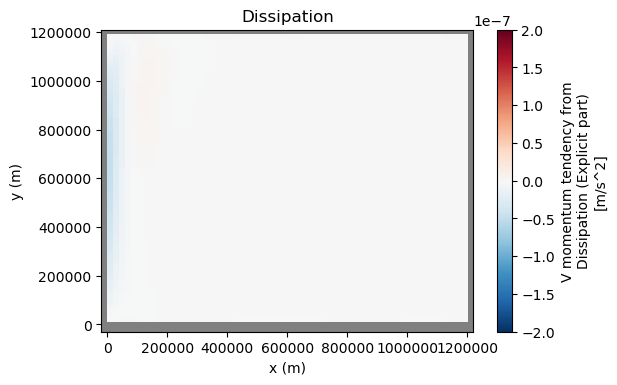

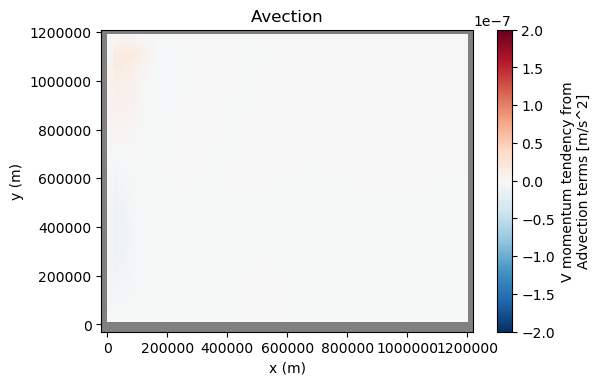

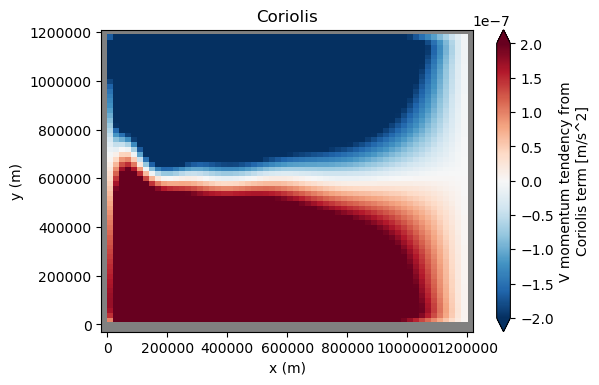

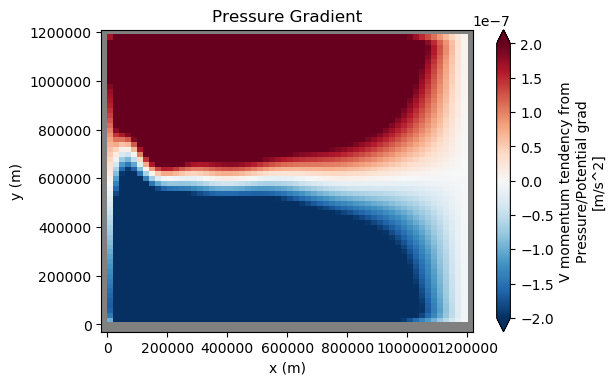

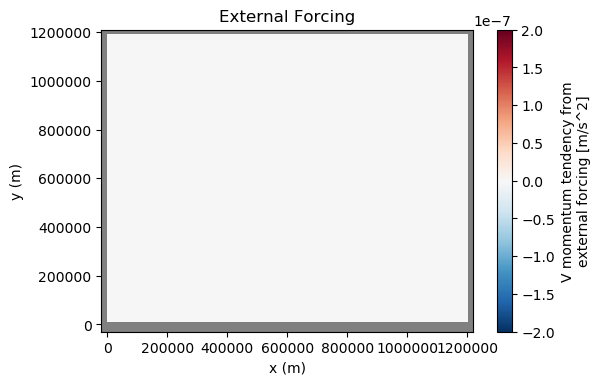

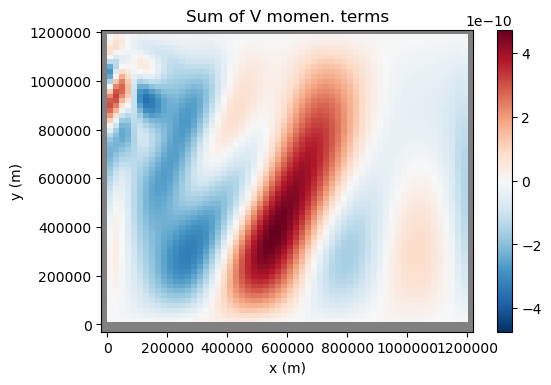

In [82]:
Vm_advec_wo_coriolis = ds.Vm_Advec - ds.Vm_Cori
Vm_advec_wo_coriolis.attrs.update(ds.Vm_Advec.attrs)

terms_V = [ds.Vm_Diss, Vm_advec_wo_coriolis, ds.Vm_Cori, ds.Vm_dPhiY , ds.Vm_Ext]
sum_terms_V = sum(terms_V)

vmax=2e-7

mask_v = ds.hFacS > 0.

for term in range(len(terms_V)):
    plt.figure(dpi=100)
    terms_V[term][-1].where(mask_v).plot(vmax=vmax, vmin=-vmax, cmap='RdBu_r')
    plt.title(names[term])
    plt.ylabel('y (m)')
    plt.xlabel('x (m)')   
      
    
plt.figure(dpi=100)
sum_terms_V[-1].where(mask_v).plot()
plt.title('Sum of V momen. terms')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.show()

In [83]:
def curl(u, v):
    """
    take the curl according to the seagrid definition
    """
    return (-grid.diff(u * ds.dxC, 'Y', boundary='extend') +
             grid.diff(v * ds.dyC, 'X', boundary='extend')) / ds.rAz



In [84]:
terms_curl = [curl(u, v) for u, v in zip(terms_U, terms_V)]

mask_z = ((1 - grid.interp(ds.hFacS, 'X', boundary='extend')) +
          (1 - grid.interp(ds.hFacW, 'Y', boundary='extend'))) < 1.
mask_z

<xarray.DataArray (YG: 62, XG: 62)>
dask.array<lt, shape=(62, 62), dtype=bool, chunksize=(61, 61), chunktype=numpy.ndarray>
Coordinates:
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

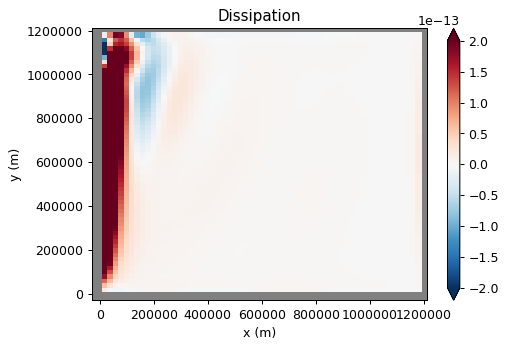

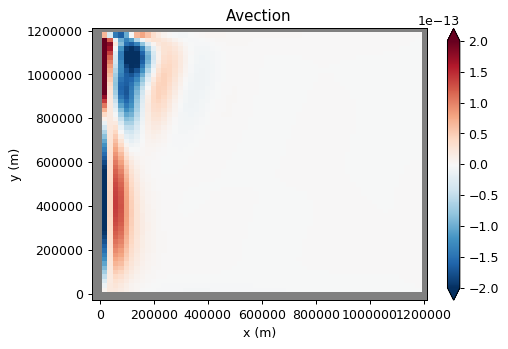

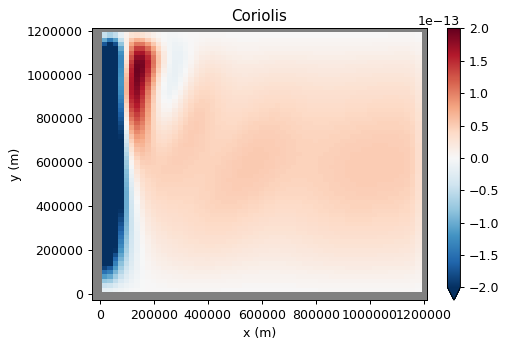

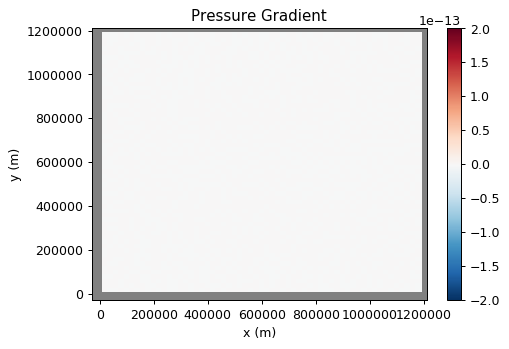

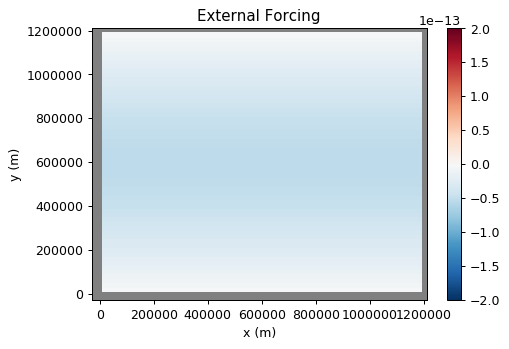

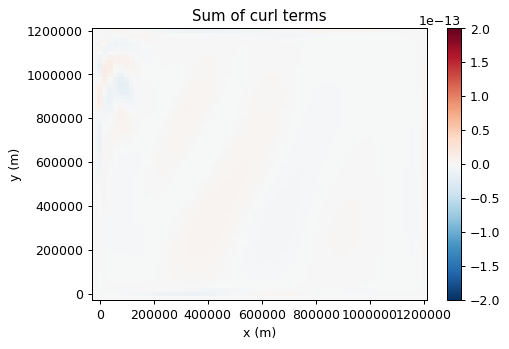

In [85]:
vmax=2e-13

for term, name in zip(terms_curl, names):
    plt.figure(dpi=90)
    term[-1].where(mask_z).plot(vmax=vmax)
    plt.title(name)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    
plt.figure(dpi=90)
sum(terms_curl)[-1].plot(vmax=vmax)
plt.title('Sum of curl terms')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

In [86]:
ds_vort = xr.merge([term.rename(name) for term, name in zip(terms_curl, names)])

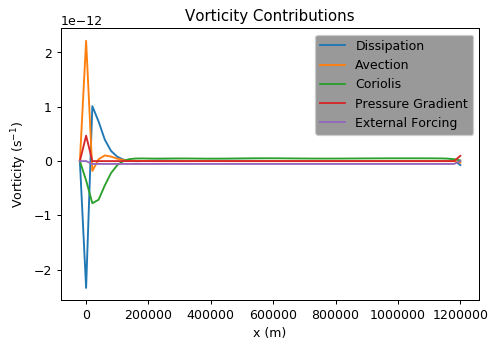

In [87]:
ds_to_plot = ds_vort.isel(time=-1).sel(YG=600000, method='nearest')

fig, ax = plt.subplots(dpi=90)
ax.set_facecolor('white')
for dvar in ds_to_plot:
    ds_to_plot[dvar].plot(label=dvar, ax=ax)

plt.title('Vorticity Contributions')
plt.xlabel('x (m)')
plt.ylabel(r'Vorticity (s$^{-1}$)')
plt.legend()
plt.show()